Task 2: Text Preprocessing and Tokenization

In [62]:
import os
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
import re

In [63]:
file_path = r'd:/NSBM (Main)/1. NSBM - Degree/Degree/3rd Year/NLP/coursework/codes/Scraped_Content/Sri_Lanka.txt'

if os.path.exists(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
else:
    print(f"File not found: {file_path}")

In [ ]:
def preprocess_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

cleaned_text = preprocess_text(text)

In [65]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(cleaned_text)


In [66]:
tokens_no_stopwords = [token.text for token in doc if not token.is_stop]

In [67]:
lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop]

In [68]:
def generate_ngrams(tokens, n):
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

bigrams = generate_ngrams(lemmatized_tokens, 2)


In [69]:
token_counts = Counter(lemmatized_tokens)
most_common_tokens = token_counts.most_common(10)

print("Most Common Tokens:", most_common_tokens)
print("Sample Bigrams:", bigrams[:10])


Most Common Tokens: [('sri', 609), ('\n', 456), ('lanka', 456), ('\n ', 405), ('archive', 278), ('original', 277), ('retrieve', 266), ('july', 150), ('2014', 129), ('15', 102)]
Sample Bigrams: ['jump content', 'content \n', '\n main', 'main menu', 'menu \n', '\n search', 'search \n', '\n appearance', 'appearance \n', '\n donate']


In [70]:
os.makedirs('t_content', exist_ok=True)
with open('t_content/Preprocessed_Text.txt', 'w', encoding='utf-8') as output_file:
    output_file.write(' '.join(lemmatized_tokens))

Task 3: POS Tagging and Named Entity Recognition (NER)

In [71]:
import spacy
from collections import Counter

In [72]:
doc = nlp(cleaned_text)


In [73]:
pos_tags = [token.pos_ for token in doc]

pos_counts = Counter(pos_tags)

most_common_pos = pos_counts.most_common()
print("Most Common POS Tags:", most_common_pos)


Most Common POS Tags: [('NOUN', 5098), ('PROPN', 4115), ('ADP', 2999), ('NUM', 2486), ('ADJ', 2102), ('DET', 2026), ('VERB', 1983), ('SPACE', 989), ('CCONJ', 566), ('AUX', 523), ('ADV', 345), ('PRON', 319), ('SCONJ', 128), ('PART', 111), ('X', 24), ('PUNCT', 1)]


In [74]:
ner_entities = [(ent.text, ent.label_) for ent in doc.ents]

entity_counts = Counter([ent[1] for ent in ner_entities])

print("Recognized Entities:", ner_entities)
print("Entity Type Counts:", entity_counts)


Recognized Entities: [('sri lanka', 'GPE'), ('241', 'CARDINAL'), ('7n 81e', 'CARDINAL'), ('democratic', 'NORP'), ('sri lanka', 'GPE'), ('tamil', 'NORP'), ('english', 'NORP'), ('sri lanka', 'GPE'), ('2 minutes and 54 seconds', 'TIME'), ('254', 'CARDINAL'), ('sri jayawardenepura', 'GPE'), ('legislative1', 'PERSON'), ('sinhalatamil3', 'PERSON'), ('english', 'LANGUAGE'), ('20124', 'DATE'), ('749', 'CARDINAL'), ('112', 'CARDINAL'), ('92', 'CARDINAL'), ('42', 'CARDINAL'), ('indian', 'NORP'), ('05', 'CARDINAL'), ('chinese', 'NORP'), ('indians', 'NORP'), ('2012', 'DATE'), ('702', 'CARDINAL'), ('126', 'CARDINAL'), ('97', 'CARDINAL'), ('islam', 'NORP'), ('74', 'CARDINAL'), ('01', 'CARDINAL'), ('republic6\n ', 'ORG'), ('anura', 'ORG'), ('543', 'CARDINAL'), ('377', 'CARDINAL'), ('10171232', 'DATE'), ('12321592\n kandyan', 'QUANTITY'), ('15921815', 'CARDINAL'), ('british', 'NORP'), ('18151948\n ', 'CARDINAL'), ('4', 'CARDINAL'), ('february 1948', 'DATE'), ('22 may 1972', 'DATE'), ('september 1978',

In [75]:
output_file_path = 't_content/POS_NER_Output.txt'

with open(output_file_path, 'w', encoding='utf-8') as output_file:
    output_file.write("Most Common POS Tags:\n")
    for pos_tag, count in most_common_pos:
        output_file.write(f"{pos_tag}: {count}\n")
    
    output_file.write("\n\n")

    output_file.write("Recognized Entities:\n")
    for entity, label in ner_entities:
        output_file.write(f"{entity} ({label})\n")

    output_file.write("\n\n")

    output_file.write("Entity Type Counts:\n")
    for entity_type, count in entity_counts.items():
        output_file.write(f"{entity_type}: {count}\n")

print("POS and NER output have been saved to 't_content/POS_NER_Output.txt'.")

POS and NER output have been saved to 't_content/POS_NER_Output.txt'.


Task 4: Sentiment Analysis

In [76]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd


In [77]:
analyzer = SentimentIntensityAnalyzer()

sentiments = []

for sentence in doc.sents:  
    sentiment_score = analyzer.polarity_scores(sentence.text)
    sentiments.append(sentiment_score)

In [78]:
def classify_sentiment(score):
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

sentiment_classes = [classify_sentiment(score) for score in sentiments]

sentiment_df = pd.DataFrame(sentiment_classes, columns=["Sentiment"])

sentiment_distribution = sentiment_df["Sentiment"].value_counts()

print("Sentiment Distribution:")
print(sentiment_distribution)


Sentiment Distribution:
Sentiment
Positive    28
Negative     5
Neutral      4
Name: count, dtype: int64


In [79]:
output_file_path = 't_content/Sentiment_Distribution.txt'

with open(output_file_path, 'w', encoding='utf-8') as output_file:
    output_file.write("Sentiment Distribution:\n")
    for sentiment, count in sentiment_distribution.items():
        output_file.write(f"{sentiment}: {count}\n")

print("Sentiment analysis output saved to 't_content/Sentiment_Distribution.txt'.")


Sentiment analysis output saved to 't_content/Sentiment_Distribution.txt'.


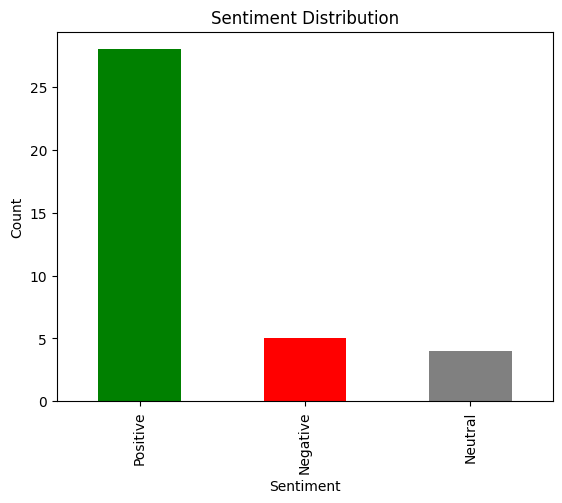

In [80]:
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


Task 5: Topic Modeling

In [1]:
# run from topicmodel environment
import spacy
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import pandas as pd
from gensim.models import LdaModel

with open('t_content/Preprocessed_Text.txt', 'r', encoding='utf-8') as file:
    preprocessed_text = file.read()

tokens = word_tokenize(preprocessed_text.lower())  

stop_words = set(stopwords.words('english'))

cleaned_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    lemmatized_texts = []
    for text in texts:
        doc = nlp(text)
        lemmatized = [token.lemma_ for token in doc if token.pos_ in allowed_postags]
        lemmatized_texts.append(" ".join(lemmatized))
    return lemmatized_texts

lemmatized_text = lemmatization([preprocessed_text])[0]

tokens_lemmatized = word_tokenize(lemmatized_text.lower())

dictionary = corpora.Dictionary([tokens_lemmatized])

corpus = [dictionary.doc2bow(tokens_lemmatized)]

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=15)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

with open('t_content/Topic_Modeling_Results.txt', 'w', encoding='utf-8') as output_file:
    output_file.write("Discovered Topics and Keywords:\n")
    for topic in topics:
        output_file.write(f"Topic: {topic[0]}\nKeywords: {topic[1]}\n\n")

print("Topic modeling results saved to 't_content/Topic_Modeling_Results.txt'.")


(0, '0.001*"original" + 0.001*"archive" + 0.001*"retrieve" + 0.000*"country" + 0.000*"government"')
(1, '0.032*"retrieve" + 0.032*"original" + 0.029*"archive" + 0.007*"country" + 0.006*"government"')
(2, '0.001*"retrieve" + 0.001*"original" + 0.000*"archive" + 0.000*"isbn" + 0.000*"country"')
(3, '0.000*"retrieve" + 0.000*"original" + 0.000*"archive" + 0.000*"pdf" + 0.000*"government"')
(4, '0.001*"retrieve" + 0.001*"original" + 0.001*"archive" + 0.000*"country" + 0.000*"pdf"')
Topic modeling results saved to 't_content/Topic_Modeling_Results.txt'.


In [2]:
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

In [3]:
print("Topic Interpretation:")
with open('t_content/Topic_Modeling_Results_Interpretation.txt', 'a', encoding='utf-8') as output_file:
    output_file.write("Topic Interpretation:\n")
    for topic in topics:
        print(f"Topic {topic[0]} seems to represent X based on keywords {topic[1]}.")
        output_file.write(f"Topic {topic[0]}: Interpretation here based on keywords.\n")

Topic Interpretation:
Topic 0 seems to represent X based on keywords 0.001*"original" + 0.001*"archive" + 0.001*"retrieve" + 0.000*"country" + 0.000*"government".
Topic 1 seems to represent X based on keywords 0.032*"retrieve" + 0.032*"original" + 0.029*"archive" + 0.007*"country" + 0.006*"government".
Topic 2 seems to represent X based on keywords 0.001*"retrieve" + 0.001*"original" + 0.000*"archive" + 0.000*"isbn" + 0.000*"country".
Topic 3 seems to represent X based on keywords 0.000*"retrieve" + 0.000*"original" + 0.000*"archive" + 0.000*"pdf" + 0.000*"government".
Topic 4 seems to represent X based on keywords 0.001*"retrieve" + 0.001*"original" + 0.001*"archive" + 0.000*"country" + 0.000*"pdf".


Task 6: Stylometric Analysis and Visualization

In [1]:
import nltk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with open('t_content/Preprocessed_Text.txt', 'r', encoding='utf-8') as file:
    preprocessed_text = file.read()

sections = preprocessed_text.split("\n\n")  


In [3]:
vectorizer = CountVectorizer(max_features=1000)  
X = vectorizer.fit_transform(sections).toarray()

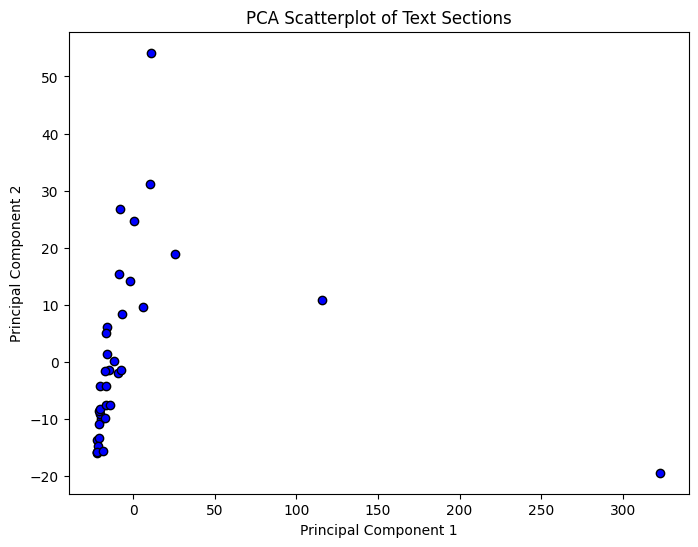

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k')
plt.title("PCA Scatterplot of Text Sections")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [5]:
from sklearn.cluster import KMeans

num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

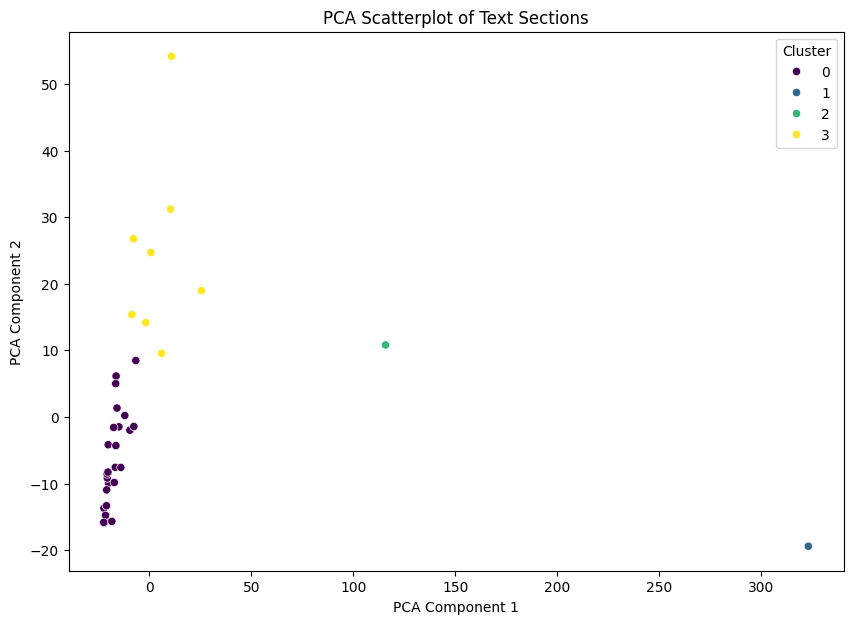

In [6]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='viridis')
plt.title("PCA Scatterplot of Text Sections")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [1]:
#run from topicmodel environment
import spacy
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

with open("t_content/Preprocessed_Text.txt", "r", encoding="utf-8") as file:
    text = file.read()

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

sentences = [sent.text for sent in doc.sents]

tokens_per_sentence = [
    [token.text.lower() for token in nlp(sentence) if not token.is_stop and not token.is_punct] 
    for sentence in sentences
]

model = Word2Vec(tokens_per_sentence, vector_size=100, window=5, min_count=1, workers=4)

def get_document_vector(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

document_vectors = [get_document_vector(sentence, model) for sentence in tokens_per_sentence]

num_clusters = min(5, len(sentences))  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(document_vectors)

labels = kmeans.labels_

document_cluster_df = pd.DataFrame({'Document': sentences, 'Cluster': labels})

document_cluster_df.head()



,Document,Cluster
0,jump content \n main menu \n search \n appeara...,3
1,54 second \n 254 \n capital \n sri jayawardene...,3
2,ppp 2023 estimate \n total \n 3186 billion10 ...,4
3,maritime silk road171819 location major tradin...,2
4,sri lankas recent history mar 26year sri lanka...,4


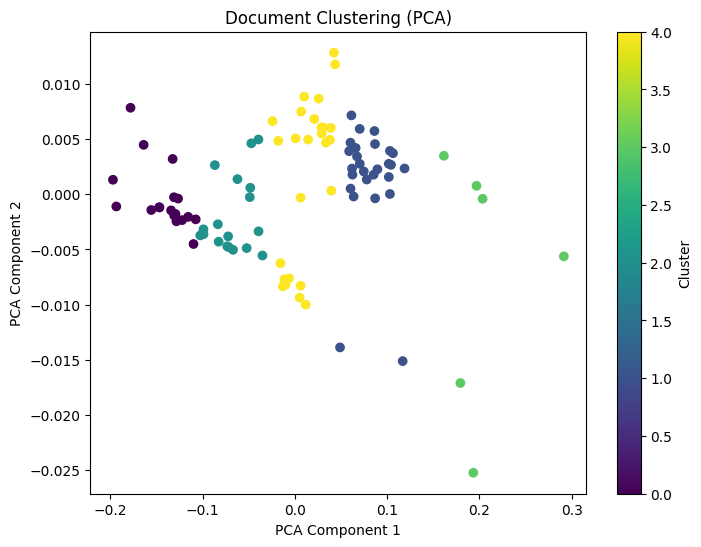

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(document_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=labels, cmap='viridis')
plt.title('Document Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.colorbar(label='Cluster')
plt.show()

In [3]:
clustered_documents = pd.DataFrame({'Document': sentences, 'Cluster': labels})

for cluster in range(num_clusters):
    print(f"Cluster {cluster} - Sample Documents:")
    sample_docs = clustered_documents[clustered_documents['Cluster'] == cluster].head()
    print(sample_docs['Document'].values)
    print("\n")


Cluster 0 - Sample Documents:
['tripiṭaka include sinhalese buddhist literature university nalanda55 245 bce bhikkhunī sanghamitta arrive jaya sri maha bodhi tree consider sapling historical bodhi tree gautama buddha enlightened56 consider old humanplanted tree continuous historical record world bodhivaṃsa5758 \n sri lanka experience foreign invasion reign suratissa defeat horse trader name sena guttika south india54 invasion come immediately 205 bce chola name elara overthrow asela rule country 44 year dutugamunu eld son southern regional subking kavan tissa defeat elara battle vijithapura half millennia existence sinhala kingdom invade time neighbour south indian dynasty chola pandya pallavacitation need incursion kingdom kalinga modern odisha malay peninsula wellcitation need \n sigiriya lion rock rock fortress city build king kashyapa 477495 ce new defensible capital buddhist monastery capital move anuradhapura \n fourth theravāda council hold anuradhapura maha viharaya sri lanka p

Task 8: Dependency Parsing and Advanced Structures

In [4]:
import spacy
import random

nlp = spacy.load("en_core_web_sm")

with open("t_content/Preprocessed_Text.txt", "r", encoding="utf-8") as file:
    text = file.read()

doc = nlp(text)

sample_sentences = random.sample(list(doc.sents), 5)

def print_dependency_structure(sentence):
    print(f"Sentence: {sentence.text}")
    for token in sentence:
        print(f"Word: {token.text}, Dep: {token.dep_}, Head: {token.head.text}, POS: {token.pos_}")
    print("\n")

for sentence in sample_sentences:
    print_dependency_structure(sentence)

Sentence: 5879187 
 western ghat india sri lanka include 18 global biodiversity hotspot high level specie endemism number biodiversity hotspot increase 34188 sri lanka high biodiversity unit area asian country flower plant vertebrate group birds189 remarkably high proportion specie flora fauna 27 3210 flower plant 22 mammal endemic190 sri lanka support rich avifauna stand 453 specie include 240 specie bird know breed country 33 specie accept ornithologist endemic ornithologist consider 27 endemic remain consider propose endemics191 sri lankas protect area administrate government body department forest conservation department wildlife conservation department wildlife conservation administrate 61 wildlife sanctuary 22 national park nature reserve strict nature reserve jungle corridor department forest conservation oversee 65 conservation forest national heritage wilderness area 265 countrys land area legally protect high percentage protect area compare rest asia192 
 sri lanka contain te

In [5]:
from spacy import displacy

displacy.render(sample_sentences[0], style='dep', jupyter=True)